In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import preprocessing
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('bestsellers with categories.csv')

In [3]:
df['Author'].value_counts()

Jeff Kinney                           12
Gary Chapman                          11
Rick Riordan                          11
Suzanne Collins                       11
American Psychological Association    10
                                      ..
F. A. Hayek                            1
Randall Munroe                         1
Bessel van der Kolk M.D.               1
David Grann                            1
Marty Noble                            1
Name: Author, Length: 248, dtype: int64

In [4]:
df['User Rating'].value_counts()

4.8    127
4.7    108
4.6    105
4.5     60
4.9     52
4.4     38
4.3     25
4.0     14
4.2      8
4.1      6
3.9      3
3.8      2
3.3      1
3.6      1
Name: User Rating, dtype: int64

In [5]:
df['Genre'].value_counts()

Non Fiction    310
Fiction        240
Name: Genre, dtype: int64

In [6]:
df.fillna(0, inplace = True)

In [7]:
df

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction
...,...,...,...,...,...,...,...
545,Wrecking Ball (Diary of a Wimpy Kid Book 14),Jeff Kinney,4.9,9413,8,2019,Fiction
546,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2016,Non Fiction
547,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2017,Non Fiction
548,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2018,Non Fiction


In [8]:
df[df['User Rating']==4.9][['Author','Year']]

,Author,Year
40,Bill Martin Jr.,2017
41,Bill Martin Jr.,2019
81,Dav Pilkey,2018
82,Dav Pilkey,2017
83,Dav Pilkey,2018
84,Dav Pilkey,2019
85,Dav Pilkey,2019
86,Dav Pilkey,2019
87,Dav Pilkey,2018
146,Sherri Duskey Rinker,2012


In [9]:
grouped = df.groupby('Name')

In [10]:
grouped['User Rating'].mean().sort_values(axis = 0)

Name
The Casual Vacancy                                                                                                         3.3
Go Set a Watchman: A Novel                                                                                                 3.6
Fifty Shades of Grey: Book One of the Fifty Shades Trilogy (Fifty Shades of Grey Series)                                   3.8
The Goldfinch: A Novel (Pulitzer Prize for Fiction)                                                                        3.9
Allegiant                                                                                                                  3.9
                                                                                                                          ... 
The Wonderful Things You Will Be                                                                                           4.9
Last Week Tonight with John Oliver Presents A Day in the Life of Marlon Bundo (Better Bundo Book, LGBT Chi

In [11]:
grouped['User Rating'].describe()

,count,mean,std,min,25%,50%,75%,max
Name,,,,,,,,
10-Day Green Smoothie Cleanse,1.0,4.7,NaN,4.7,4.7,4.7,4.7,4.7
11/22/63: A Novel,1.0,4.6,NaN,4.6,4.6,4.6,4.6,4.6
12 Rules for Life: An Antidote to Chaos,1.0,4.7,NaN,4.7,4.7,4.7,4.7,4.7
1984 (Signet Classics),1.0,4.7,NaN,4.7,4.7,4.7,4.7,4.7
"5,000 Awesome Facts (About Everything!) (National Geographic Kids)",1.0,4.8,NaN,4.8,4.8,4.8,4.8,4.8
...,...,...,...,...,...,...,...,...
Winter of the World: Book Two of the Century Trilogy,1.0,4.5,NaN,4.5,4.5,4.5,4.5,4.5
Women Food and God: An Unexpected Path to Almost Everything,1.0,4.2,NaN,4.2,4.2,4.2,4.2,4.2
Wonder,5.0,4.8,0.0,4.8,4.8,4.8,4.8,4.8


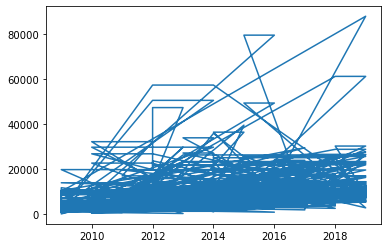

In [12]:
plt.plot(df['Year'],df['Reviews'])

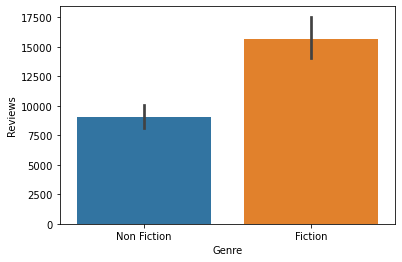

In [13]:
sns.barplot(x='Genre', y= 'Reviews', data = df)

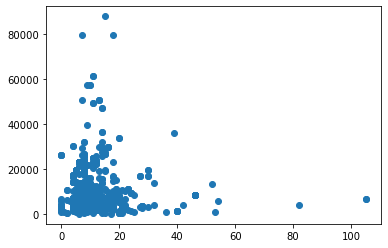

In [14]:
plt.scatter(df['Price'],df['Reviews'])

In [15]:
df['Genre'].replace(to_replace=['Non Fiction','Fiction'], value=[1,0],inplace=True)
df.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,1
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,0
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,1
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,0
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,1


In [16]:
X = df[['User Rating', 'Reviews', 'Price', 'Year']]
print(X[0:5])
y = df['Genre'].values
y[0:5]

   User Rating  Reviews  Price  Year
0          4.7    17350      8  2016
1          4.6     2052     22  2011
2          4.7    18979     15  2018
3          4.7    21424      6  2017
4          4.8     7665     12  2019


array([1, 0, 1, 0, 1])

In [17]:
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[ 0.35999008,  0.46045266, -0.47080975,  0.63245553],
       [-0.08097772, -0.84478593,  0.82160918, -0.9486833 ],
       [ 0.35999008,  0.59944035,  0.17539971,  1.26491106],
       [ 0.35999008,  0.80804987, -0.65544103,  0.9486833 ],
       [ 0.80095789, -0.36587991, -0.1015472 ,  1.58113883]])

In [18]:
#prediction from logistic regression

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.25, shuffle = False)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (412, 4) (412,)
Test set: (138, 4) (138,)


In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
LR
yhat = LR.predict(X_test)
print(yhat)

yhat_prob = LR.predict_proba(X_test)

[1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 1 1 1 1 1 1 0 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 0 0 1 0 1 0 0 0 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 1 1 1
 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 1 1 1 0 1 0 0 0 0 0 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 0 0 0 0 1 1 1 1 1]


In [20]:
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
jaccard_score(y_test, yhat,pos_label=0)

0.35064935064935066

In [21]:
#some resons why the train_acc can be very high but test_acc can be very low 
#Am I overfitting? Do I have a bug in the code? Am I suffering from data leakage?

In [22]:
train, test, ytrain, ytest = train_test_split(X, y,test_size=0.35, random_state=4)

print('train set = ', train.shape, ytrain.shape)
print('test set = ', test.shape, ytest.shape)

train set =  (357, 4) (357,)
test set =  (193, 4) (193,)


In [23]:
from sklearn.tree import DecisionTreeClassifier
infogain = DecisionTreeClassifier(criterion="entropy", max_depth = 4)

In [24]:
infogain.fit(train,ytrain)
prediction = infogain.predict(test)
#visually comparing the predition to the actual values
print (prediction[0:5])
print (ytest[0:5])
# accuracy prediction
from sklearn import metrics
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(ytest, prediction))
print("F1 score = ", f1_score(ytest, prediction, average='weighted'))

[1 0 0 1 1]
[1 0 1 0 1]
DecisionTrees's Accuracy:  0.7564766839378239
F1 score =  0.7484174070242002


In [25]:
train, test, ytrain, ytest = train_test_split(X, y,test_size=0.25, random_state=10)

print('train set = ', train.shape, ytrain.shape)
print('test set = ', test.shape, ytest.shape)

train set =  (412, 4) (412,)
test set =  (138, 4) (138,)


In [26]:
#training the set using SVM
from sklearn import svm
trainset = svm.SVC(kernel='rbf')
trainset.fit(train, ytrain) 
#predecting
pred = trainset.predict(test)
print(ytest[0:10])
print(pred[0:10])

#calculating accuracy through F1 score
from sklearn.metrics import f1_score
print("F1 score = ", f1_score(ytest, pred, average='weighted'))
print("Jaccard index = ", metrics.accuracy_score(ytest, pred))

[0 0 0 0 0 0 0 1 0 1]
[1 0 1 0 1 0 0 0 1 1]
F1 score =  0.7435544340481703
Jaccard index =  0.7463768115942029


In [27]:
#okay so decicion tree and Support vector mechine are good models for this model rather than KNN and Logestic regression 
#In KNN the model was over fitting and Logestic regression failed as a model

In [28]:
df['Genre'].value_counts()

1    310
0    240
Name: Genre, dtype: int64